<a href="https://colab.research.google.com/github/JeanAlmeida1/Previsao_de_credito/blob/main/Modelo_de_previs%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto: projeção de crédito para clientes bancários

Base de dados: https://www.kaggle.com/arjunbhasin2013/ccdata

O projeto consiste em captar clientes para um fictício banco digital. Para isso, o banco disponibilizou dados de clientes de outros bancos e seus comportamentos financeiros, como dinheiro em conta, movimentações, limite de crédito, compras parceladas, entre outros. A ideia do banco é oferecer créditos mais justos para esses possíveis clientes, baseando-se no histórico financeiro dos mesmos em outros bancos.

O desenvolvimento do modelo se dará em duas partes: 

1. Clusterização de clientes similares
2. Previsão do crédito que o banco digital oferecerá para esses clientes 

## Carregamento das bibliotecas e inspeção inicial

In [228]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [229]:
df = pd.read_csv('CC GENERAL.csv')

In [230]:
df.dropna(inplace=True)

In [231]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [232]:
# Tamanho dos dados
df.shape

(8636, 18)

In [233]:
# Formato dos dados 
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [234]:
# Removendo coluna com dados do tipo "object"
df = df.drop(columns=['CUST_ID'])

In [235]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Limpeza das variáveis

In [236]:
# Encontrando valores nulos 
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [237]:
# Substituindo valores nulos pelo mínimo
credit_min = df['CREDIT_LIMIT'].min()
minimum_payments_min = df['MINIMUM_PAYMENTS'].min()
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(credit_min)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(minimum_payments_min)

In [238]:
# Removendo outliers
df1 = df[df['BALANCE'] < df['BALANCE'].quantile(.95)]
df1 = df1[df1['PURCHASES'] < df['PURCHASES'].quantile(.95)]
df1 = df1[df1['ONEOFF_PURCHASES'] < df['ONEOFF_PURCHASES'].quantile(.95)]
df1 = df1[df1['CASH_ADVANCE'] < df['CASH_ADVANCE'].quantile(.95)]
df1 = df1[df1['PAYMENTS'] < df['PAYMENTS'].quantile(.95)]
df1 = df1[df1['CREDIT_LIMIT'] < df['CREDIT_LIMIT'].quantile(.95)]
df1 = df1[df1['MINIMUM_PAYMENTS'] < df['MINIMUM_PAYMENTS'].quantile(.95)]
df1 = df1[df1['PURCHASES_TRX'] < df['PURCHASES_TRX'].quantile(.95)]
df1 = df1[df1['CASH_ADVANCE_TRX'] < df['CASH_ADVANCE_TRX'].quantile(.95)]

In [239]:
df = df1.copy()

## Análise descritiva



<Figure size 432x288 with 0 Axes>

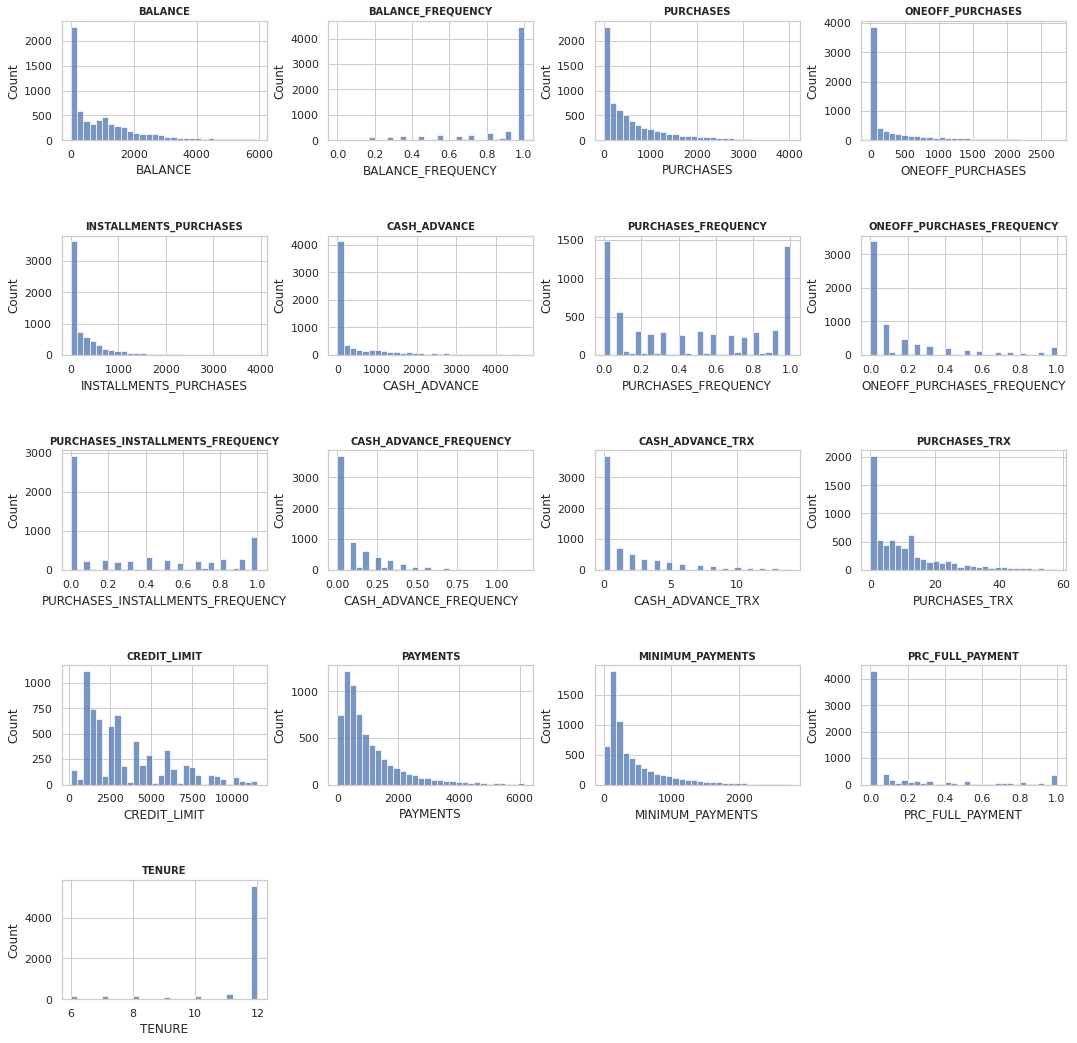

In [240]:
# Plotando o histograma das variáveis 

sns.set_theme(style='whitegrid')

#1 - definindo o número de linhas e colunas do plot 
colnames_number = df.columns
ncols = 4
nrows = int(np.ceil(len(colnames_number)/ncols*1.0))

#2 - Fazendo um for para percorrer todos os axis e plotar as figuras

fig = plt.figure()
fig, axes = plt.subplots(nrows = nrows, ncols=ncols, figsize=(18,18))   


counter = 0
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    
    if counter < len(colnames_number):
      sns.histplot(x = df[colnames_number[counter]], palette='hls', bins=30, ax=ax)
      ax.set_title(colnames_number[counter], fontsize=10, fontweight='bold')
    else:
      ax.set_axis_off()
    counter += 1 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.8)

fig.show()


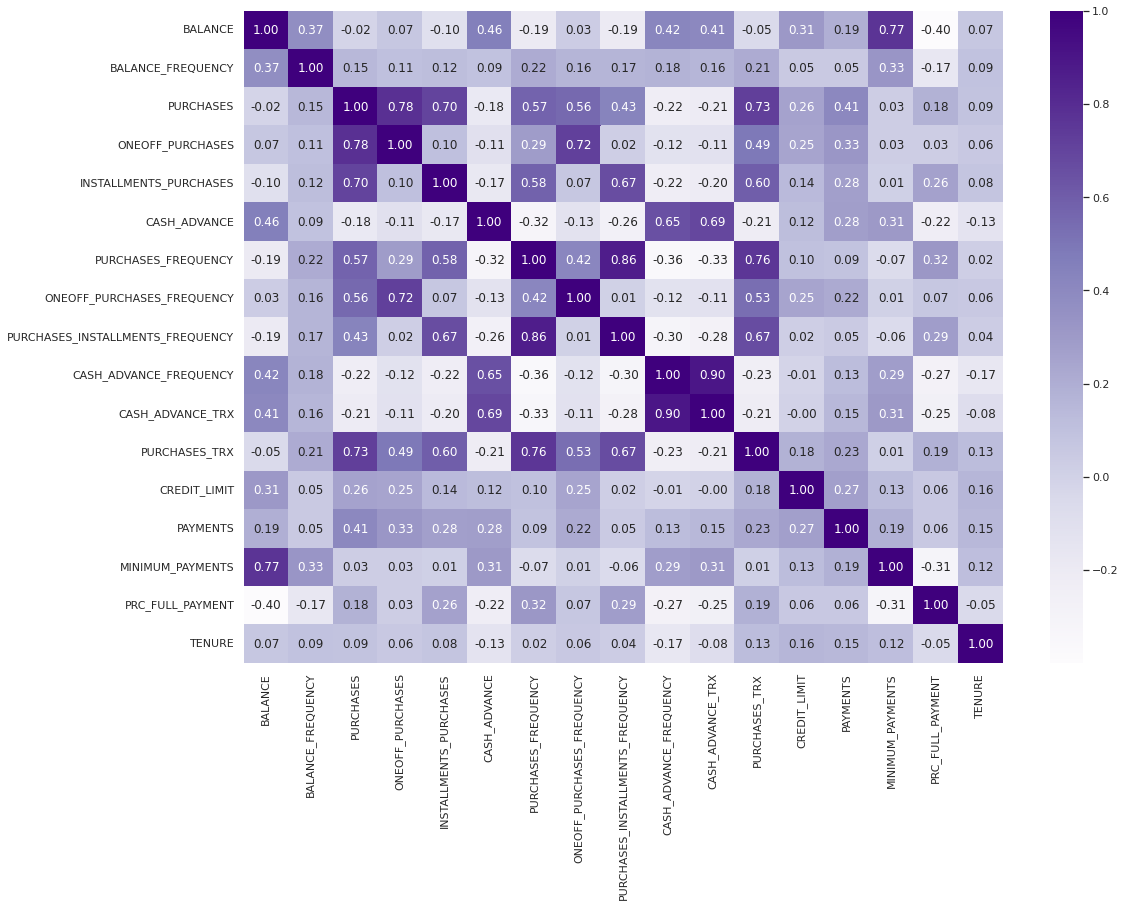

In [241]:
# Análise de correlação 

p = df.corr()
plt.figure(figsize=(17,12))
sns.heatmap(p, annot=True, cmap='Purples', fmt='.2f')

## Determinando a quantidade de clusters

In [242]:
# Usando a curva de Elbow 

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

inertias = []
K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    inertias.append(kmeanModel.inertia_)

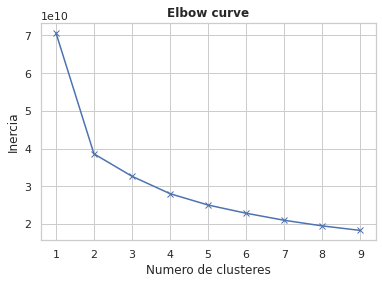

In [243]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Numero de clusteres')
plt.ylabel('Inercia')
plt.title('Elbow curve', fontweight='bold')
plt.show()

In [244]:
# Usando Silhouette Score

from sklearn.metrics import silhouette_samples, silhouette_score

Para o nº de clusters = 2 O silhouette_score médio é : 0.4641076357093138
Para o nº de clusters = 3 O silhouette_score médio é : 0.4388340048633554
Para o nº de clusters = 4 O silhouette_score médio é : 0.3434188995805696
Para o nº de clusters = 5 O silhouette_score médio é : 0.31653022781031925
Para o nº de clusters = 6 O silhouette_score médio é : 0.323378501455125
Para o nº de clusters = 7 O silhouette_score médio é : 0.2721562874512974
Para o nº de clusters = 8 O silhouette_score médio é : 0.27001273481670396
Para o nº de clusters = 9 O silhouette_score médio é : 0.27952271476397633


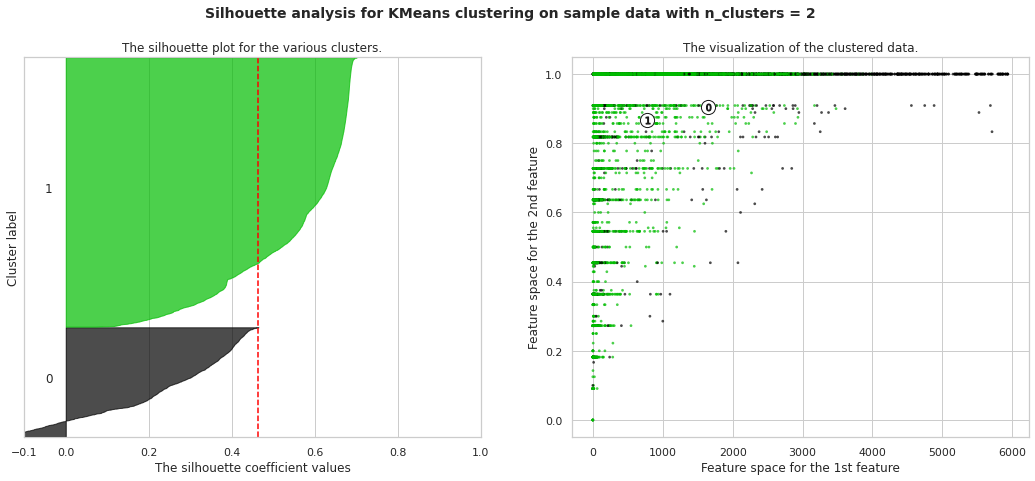

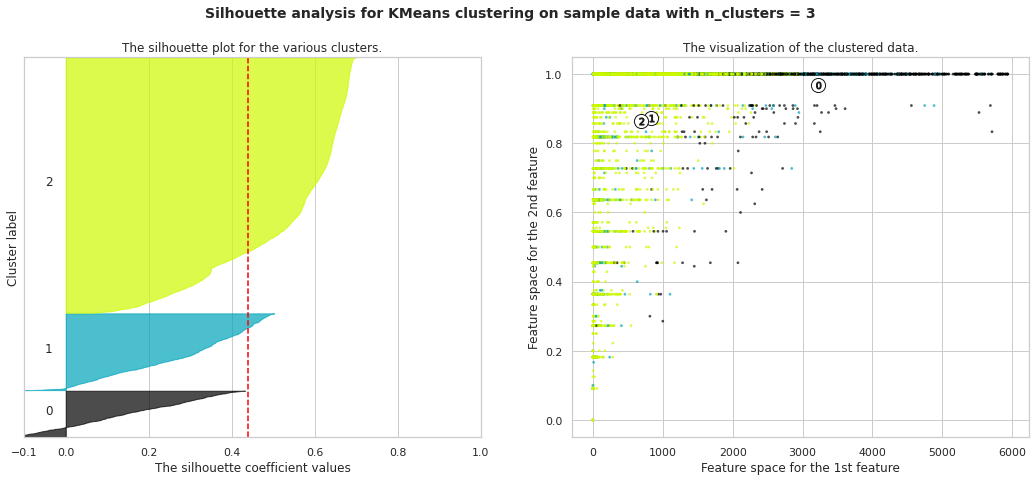

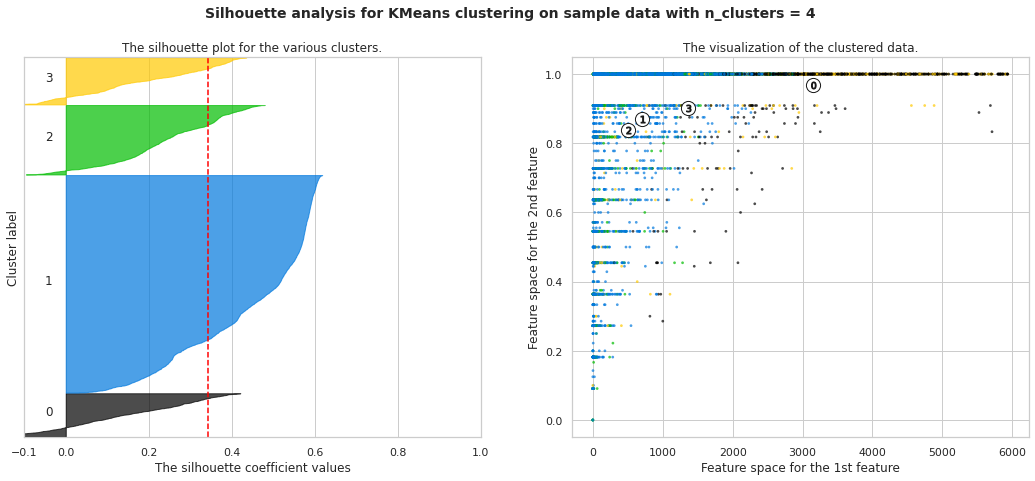

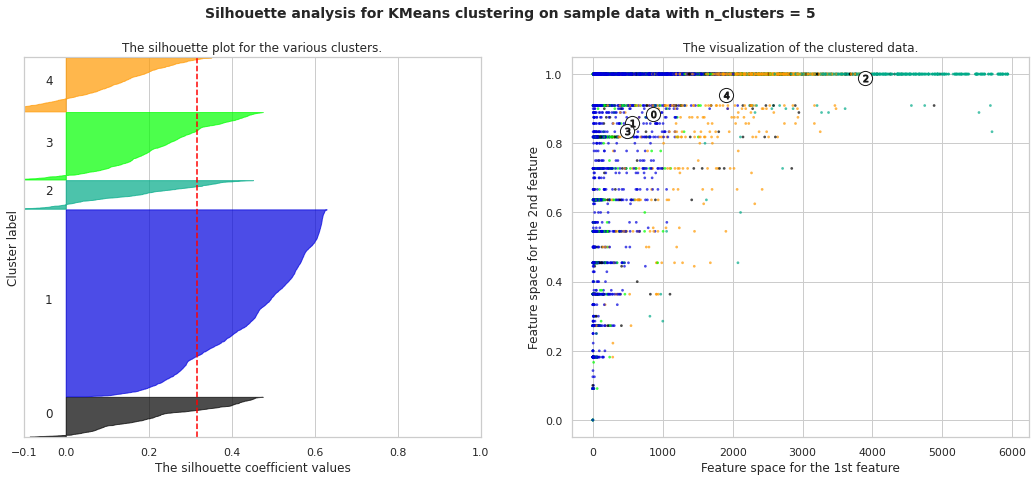

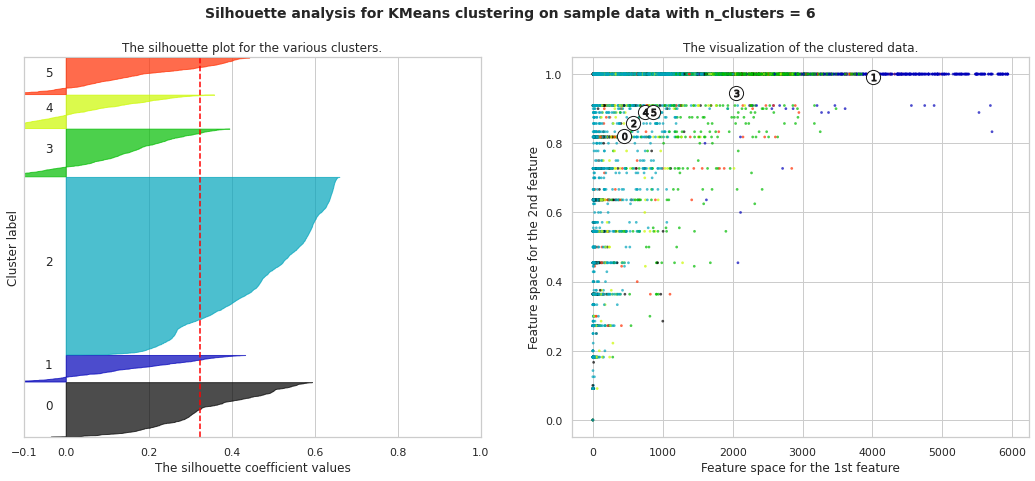

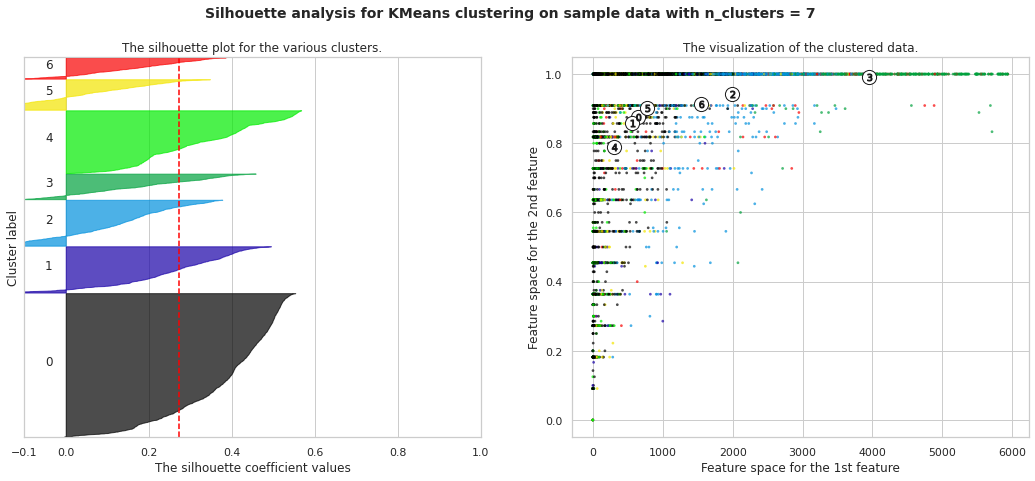

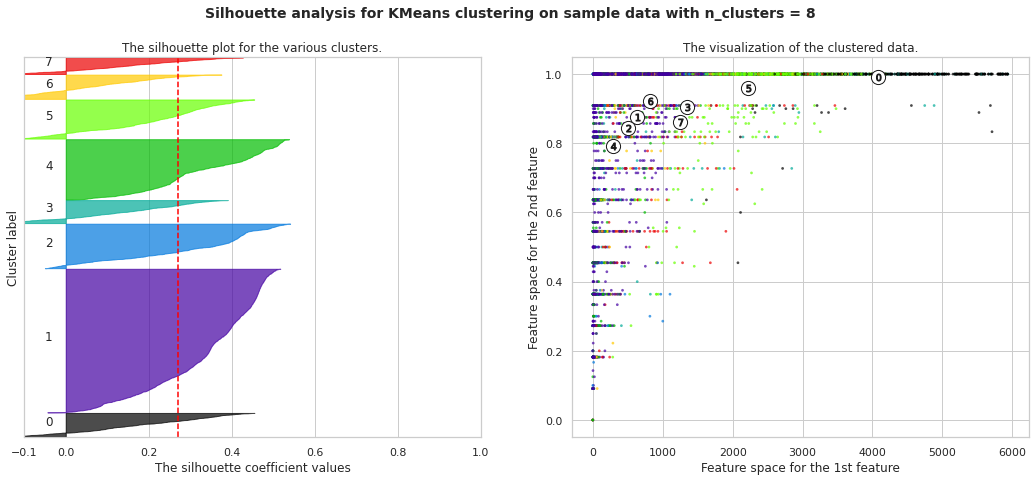

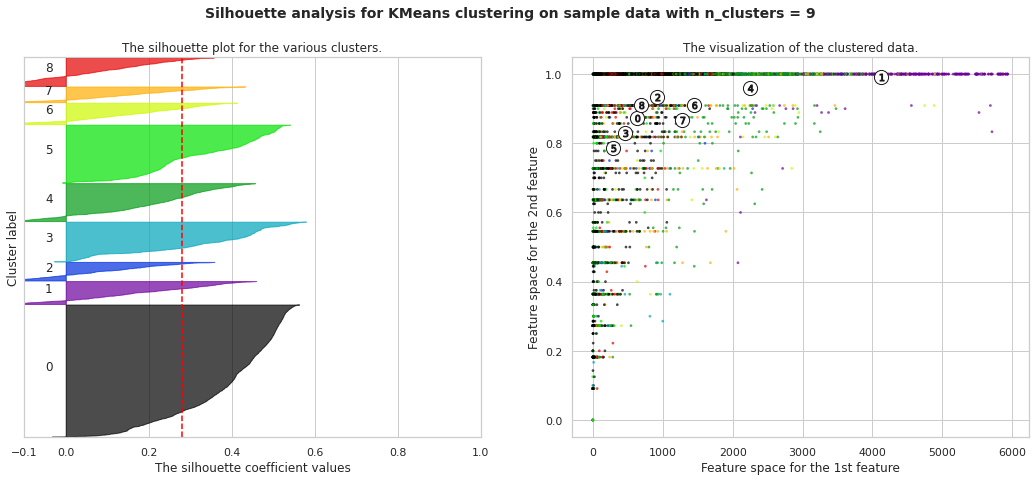

In [245]:
for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "Para o nº de clusters =",
        n_clusters,
        "O silhouette_score médio é :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df.iloc[:, 0], df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Clusterização

Clusterizando clientes similares

In [246]:
from sklearn.mixture import GaussianMixture

In [247]:
model = GaussianMixture(n_components=3, max_iter=300, random_state=42)
y_pred = model.fit_predict(df)

In [248]:
df['cluster'] = y_pred

## Regressão

Prevendo o Credit_Limit utilizando os dados 

In [249]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.0,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.0,12,2
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12,2


In [260]:
y = df['CREDIT_LIMIT']
X = df[df.columns[df.columns != 'CREDIT_LIMIT']]

In [262]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
scaler = StandardScaler()  
Xtrain_norm = scaler.fit_transform(X_train)
Xtest_norm = scaler.fit_transform(X_test)

In [259]:
from sklearn.neural_network import MLPRegressor

In [270]:
reg = MLPRegressor().fit(Xtrain_norm, y_train)
y_pred = reg.predict(Xtest_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [272]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [274]:
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print('R2: {:.2f}'.format(R2))
print('MAE: {:.2f}'.format(MAE))

R2: 0.25
MAE: 1599.96


In [275]:
df['CREDIT_LIMIT'].describe()

count     6628.000000
mean      3478.737717
std       2486.744441
min        150.000000
25%       1500.000000
50%       2700.000000
75%       5000.000000
max      11500.000000
Name: CREDIT_LIMIT, dtype: float64

Nosso erro absoluto médio foi de pouco mais de 60% do desvio padrão de Credit Limit, o que aponta uma performance satisfatória nas previsões de crédito. 